In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [90]:
train_data = pd.read_csv("/kaggle/input/playground-series-s3e22/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s3e22/test.csv")
train_data = train_data.set_index("id")
test_data = test_data.set_index("id")

In [91]:
train_data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived


Distribution of categorical features

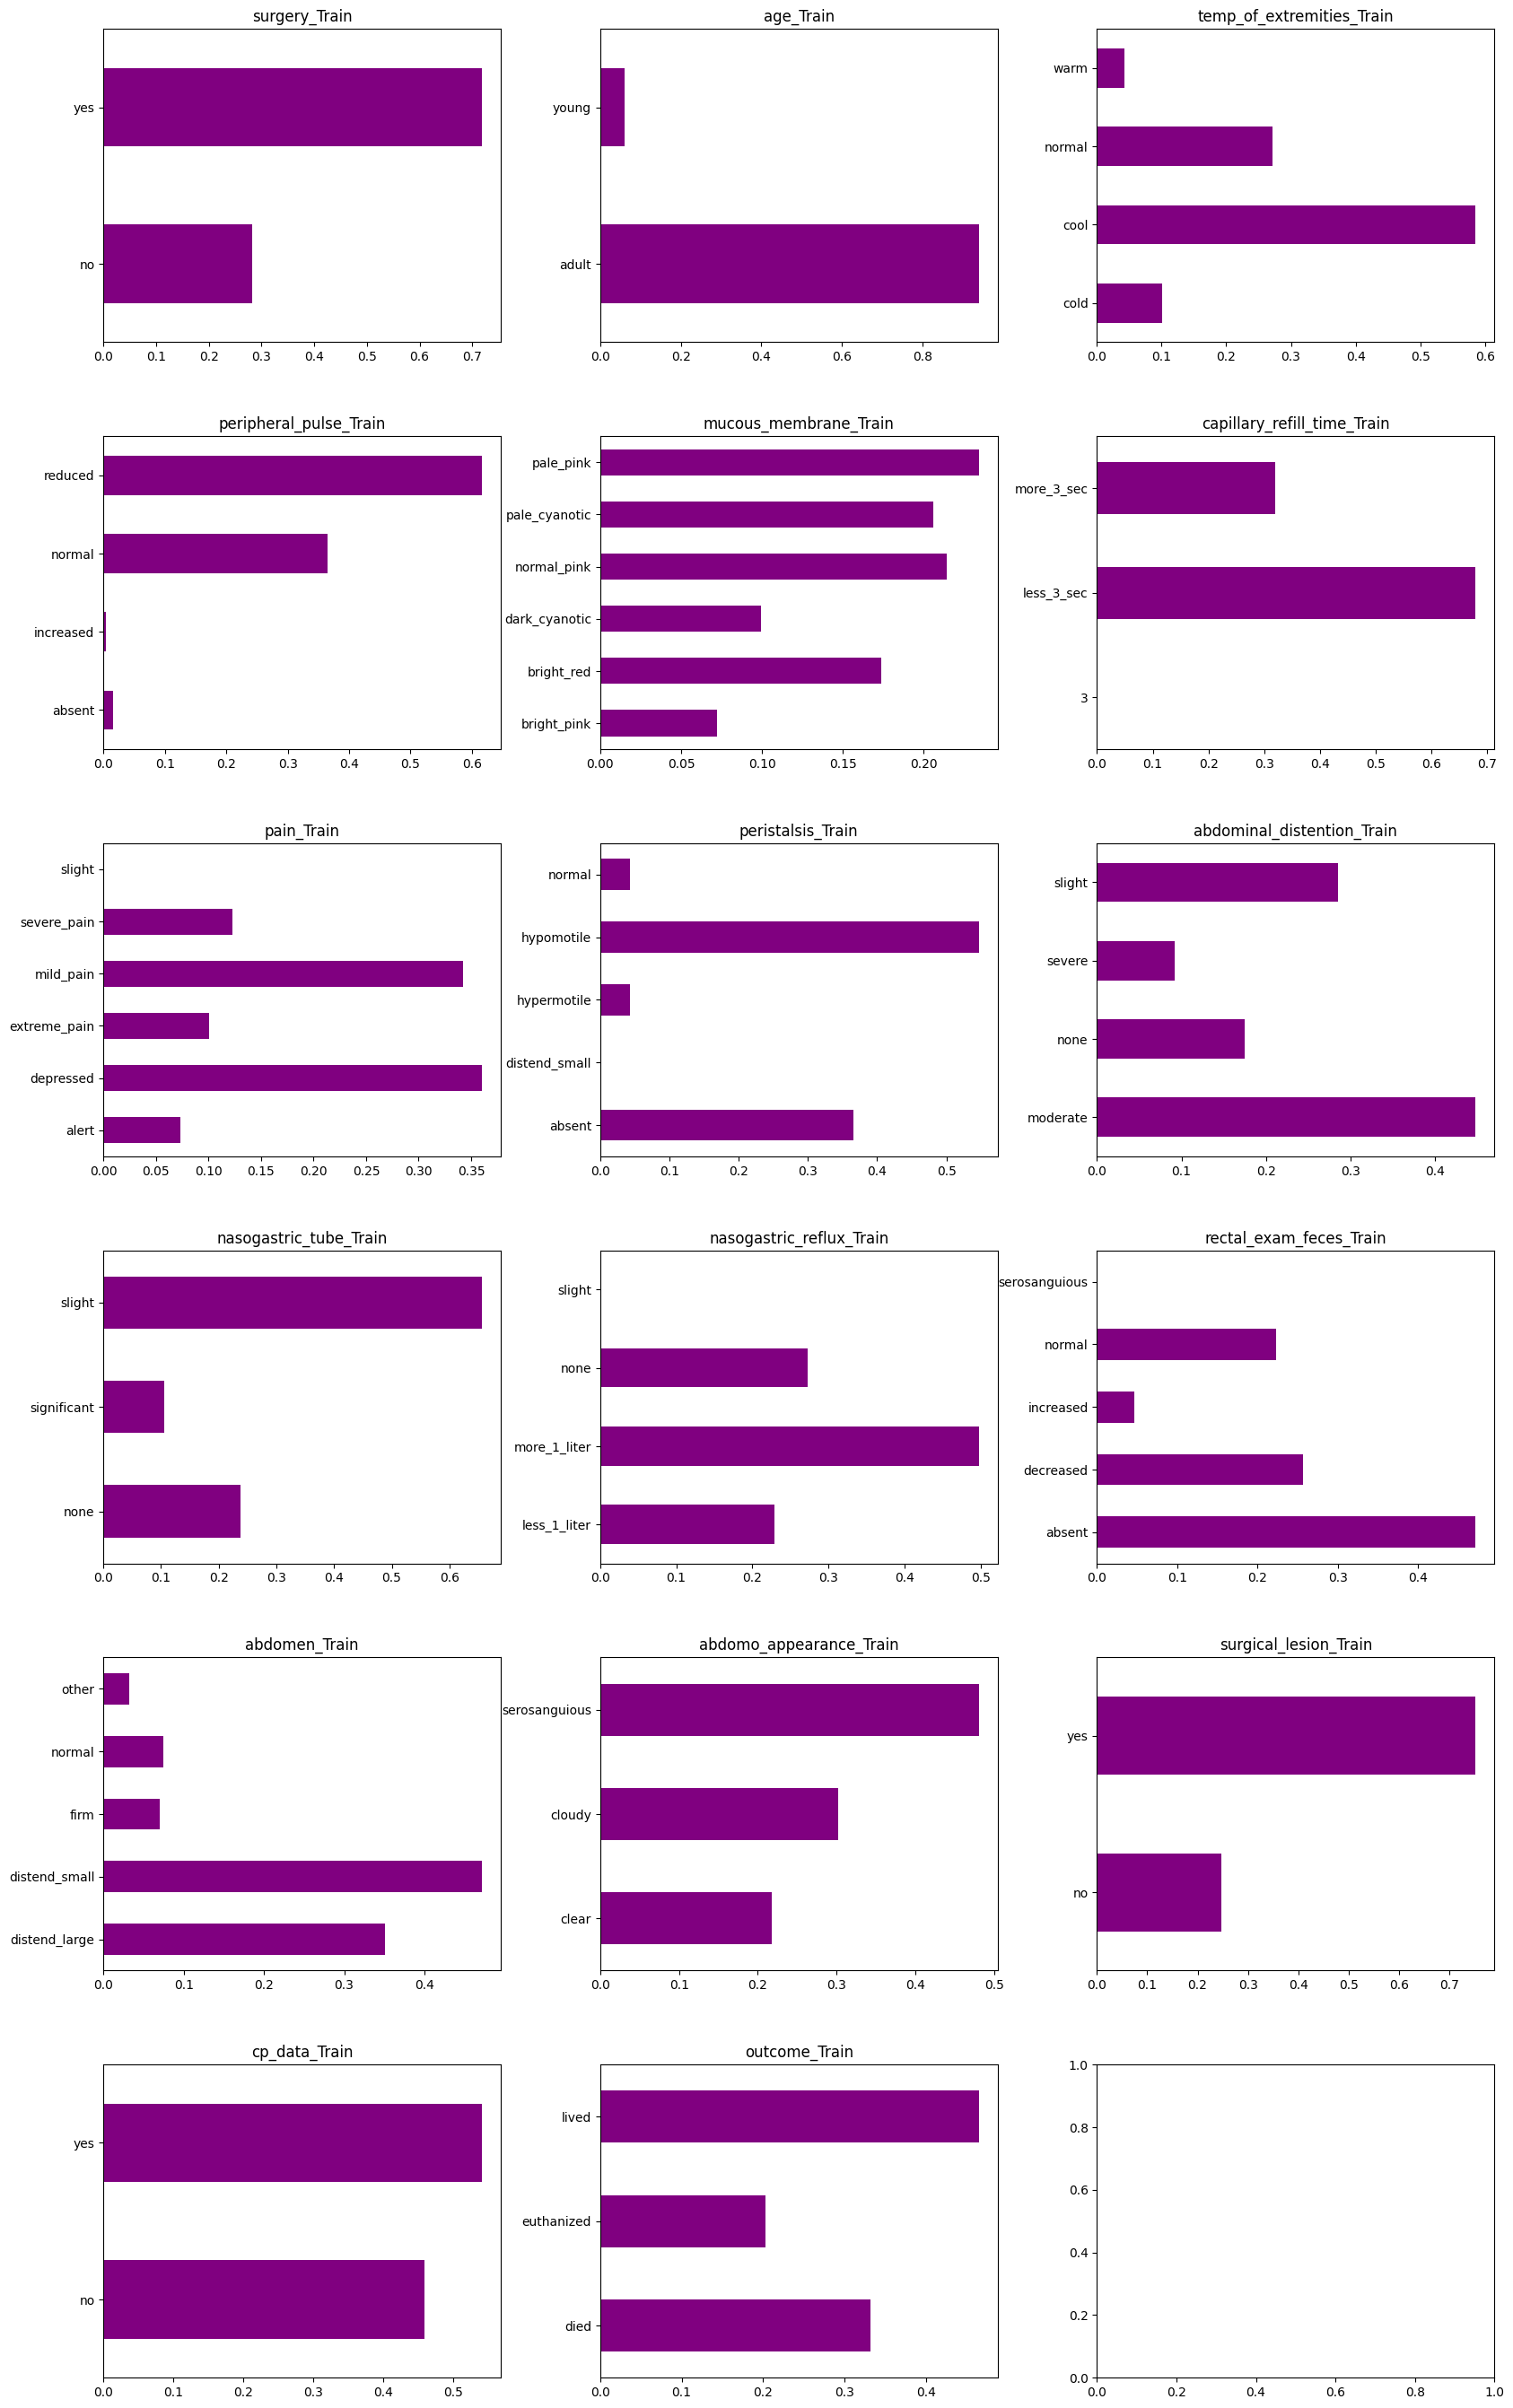

In [92]:
dtypes = train_data.dtypes.to_dict()
cat_cols = []
num_cols = []
for column, typ in dtypes.items():
    if typ == "object":
        cat_cols.append(column)
    else:
        num_cols.append(column)

fig, axes = plt.subplots(len(cat_cols)//3 + 1, 3, figsize = (20, len(cat_cols)* 2), 
                             gridspec_kw = {'wspace': 0.25, 'hspace': 0.3})
for i, column in enumerate(cat_cols):
    ax = axes[i//3, i%3]
    a = train_data[column].value_counts(normalize = True)
    a.sort_index().plot.barh(ax = ax, color = 'purple')
    ax.set_title(f"{column}_Train")
    ax.set(ylabel = '')

Distribution of numerical features

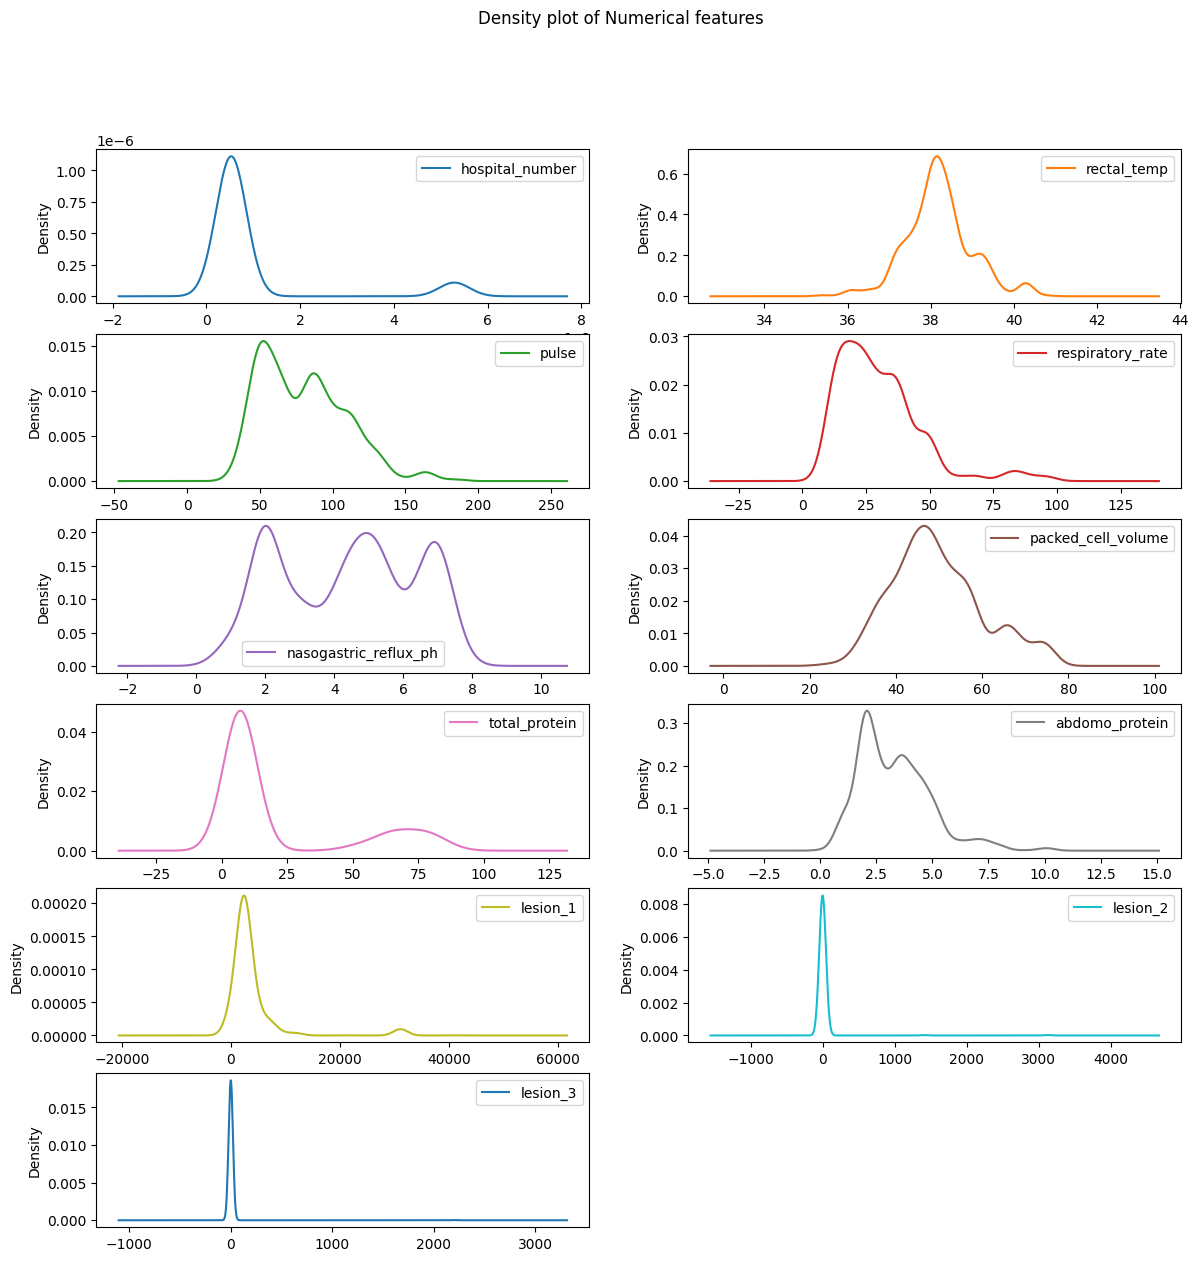

In [93]:
train_data[num_cols].plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

Heatmap of numerical columns

In [94]:
# Display rows with missing values in any column
rows_with_missing_data =train_data[train_data.isnull().any(axis=1)]
print(rows_with_missing_data)


     surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
id                                                                           
2        yes  adult           529812         38.3  120.0              28.0   
6        yes  adult           534787         38.3   36.0              16.0   
9        yes  adult           529640         38.3  129.0              48.0   
14       yes  adult           528134         38.0  124.0              88.0   
15        no  adult           528305         38.3   44.0              24.0   
...      ...    ...              ...          ...    ...               ...   
1216     yes  adult           534293         38.5  132.0              48.0   
1221     yes  adult           533942         38.3  112.0              16.0   
1223     yes  adult           529304         38.0   44.0              14.0   
1230     yes  adult           535246         38.5  129.0              48.0   
1234     yes  adult           528548         38.1   54.0        

<Axes: >

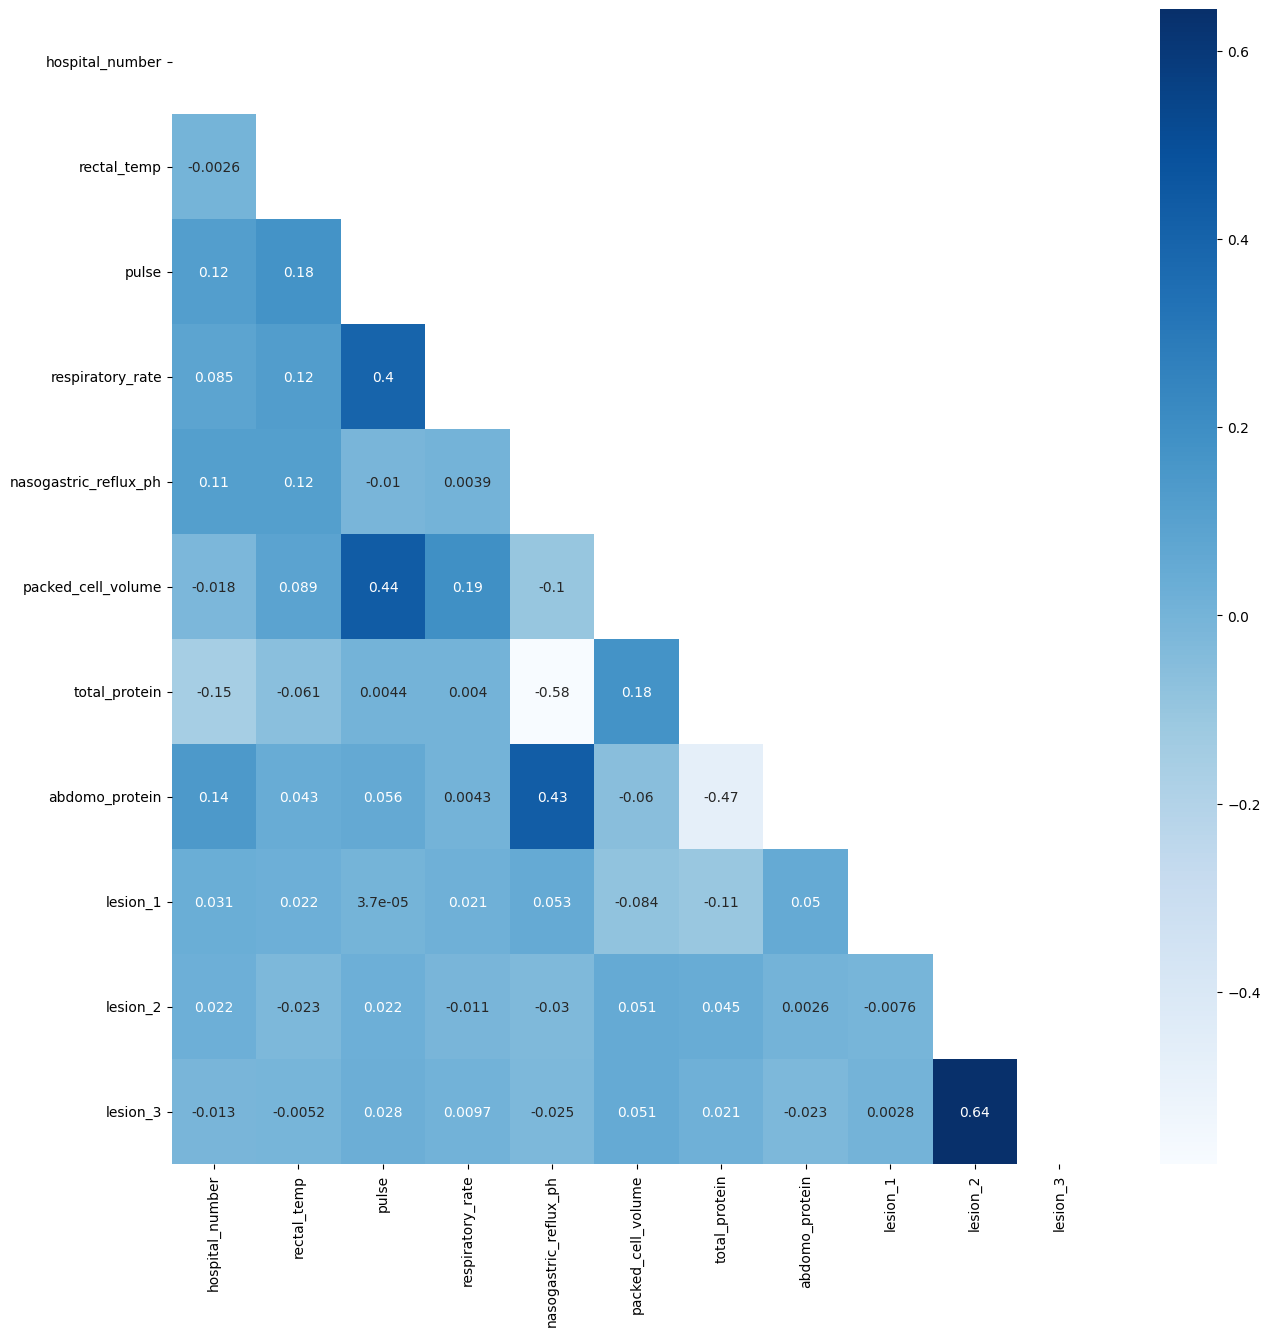

In [95]:
plt.figure(figsize=(15,15))
corr = train_data[num_cols].corr(method = "pearson")
mask = np.triu(np.triu(corr))
sns.heatmap(data = corr,annot=True, cmap = 'Blues', mask=mask) 


Handling missing data

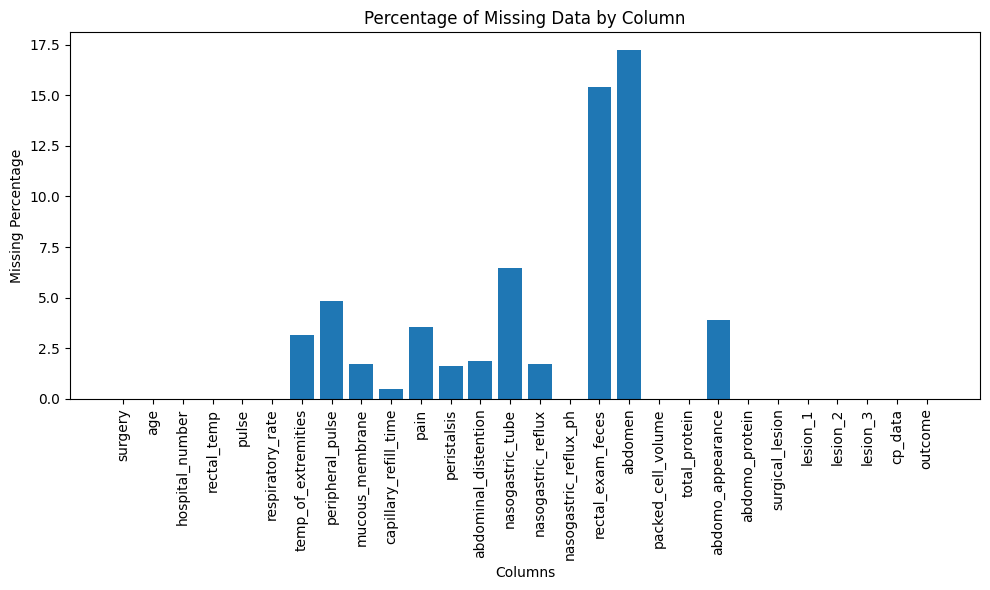

In [96]:
missing_percentage = (train_data.isnull().sum() / len(train_data)) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(missing_percentage.index, missing_percentage.values)
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.title('Percentage of Missing Data by Column')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [97]:
# Get the total number of missing values per column
missing_values_count = train_data.isnull().sum()

# Calculate the percentage of missing values per column
missing_values_percentage = (missing_values_count / len(train_data)) * 100

# Create a DataFrame to display the statistics
missing_values_stats = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Percentage of Missing Values': missing_values_percentage
})

# Sort the DataFrame by the percentage of missing values (descending order)
missing_values_stats = missing_values_stats.sort_values(by='Percentage of Missing Values', ascending=False)

# Display the statistics
print("Statistics of Missing Values in the Dataset:")
print(missing_values_stats)

Statistics of Missing Values in the Dataset:
                       Missing Values Count  Percentage of Missing Values
abdomen                                 213                     17.246964
rectal_exam_feces                       190                     15.384615
nasogastric_tube                         80                      6.477733
peripheral_pulse                         60                      4.858300
abdomo_appearance                        48                      3.886640
pain                                     44                      3.562753
temp_of_extremities                      39                      3.157895
abdominal_distention                     23                      1.862348
nasogastric_reflux                       21                      1.700405
mucous_membrane                          21                      1.700405
peristalsis                              20                      1.619433
capillary_refill_time                     6                      0.

In [98]:
train_data.to_csv("train_data", index=False)
test_data.to_csv("test_data", index=False)


In [99]:
# Unique value counts for each column
unique_counts = train_data.nunique()

# Threshold to distinguish continuous and categorical
threshold = 10

continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()

# Removing the 'outcome' from categorical since it's our target variable
if 'outcome' in categorical_vars:
    categorical_vars.remove('outcome')
if 'id' in continuous_vars:
    continuous_vars.remove('id')


Since all the missing data are in categorical variables, i'm gonna use RF model. Before doing that, since i have Categorical variables I need to transform the data through Label Encoding

I had some problem with MissForest library in Python so I moved to Rstudio, I'll put the code here

In [100]:
#Rstudio code in markdown:
'''
```{r}
file_path <- "C:/Users/emanu/Downloads/train_data"
data <- read.csv(file_path, na.strings = c("", "NA"))
data
```

```{r}
unique_counts <- sapply(data, function(x) length(unique(x)))
threshold <- 10

continuous_vars <- names(unique_counts[unique_counts > threshold])
categorical_vars <- names(unique_counts[unique_counts <= threshold])
categorical_vars <- setdiff(categorical_vars, "outcome")
continuous_vars <- setdiff(continuous_vars, "id")
```

```{r}
data$outcome <- ifelse(data$outcome == "lived", 2,
                              ifelse(data$outcome == "euthanized", 1, 0))

```

```{r}
#label encoding
library(dplyr)
library(dplyr)
data2 <- data %>%
  mutate_at(categorical_vars, ~as.numeric(factor(.)))

```

```{r}
library(missForest)
imputed_data <- missForest(data2)
imputed_df <- imputed_data$imputed
```

```{r}
data=imputed_data$ximp
data[categorical_vars][, sapply(data[categorical_vars], is.numeric)] <- lapply(data[categorical_vars][, sapply(data[categorical_vars], is.numeric)], round)

print(data[categorical_vars])

```

```{r}
missing_per_column <- colSums(is.na(data))
print(missing_per_column)
```

```{r}
file_path <- "C:/Users/emanu/Downloads/output.csv"
write.csv(data, file_path, row.names = FALSE)

```
'''

'\n```{r}\nfile_path <- "C:/Users/emanu/Downloads/train_data"\ndata <- read.csv(file_path, na.strings = c("", "NA"))\ndata\n```\n\n```{r}\nunique_counts <- sapply(data, function(x) length(unique(x)))\nthreshold <- 10\n\ncontinuous_vars <- names(unique_counts[unique_counts > threshold])\ncategorical_vars <- names(unique_counts[unique_counts <= threshold])\ncategorical_vars <- setdiff(categorical_vars, "outcome")\ncontinuous_vars <- setdiff(continuous_vars, "id")\n```\n\n```{r}\ndata$outcome <- ifelse(data$outcome == "lived", 2,\n                              ifelse(data$outcome == "euthanized", 1, 0))\n\n```\n\n```{r}\n#label encoding\nlibrary(dplyr)\nlibrary(dplyr)\ndata2 <- data %>%\n  mutate_at(categorical_vars, ~as.numeric(factor(.)))\n\n```\n\n```{r}\nlibrary(missForest)\nimputed_data <- missForest(data2)\nimputed_df <- imputed_data$imputed\n```\n\n```{r}\ndata=imputed_data$ximp\ndata[categorical_vars][, sapply(data[categorical_vars], is.numeric)] <- lapply(data[categorical_vars][,

In [101]:
train_imp = pd.read_csv("/kaggle/input/train-imp-hot/train_imp_hot.csv")
train_imp

,surgeryno,surgeryyes,ageadult,ageyoung,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremitiescold,temp_of_extremitiescool,...,surgical_lesionno,surgical_lesionyes,lesion_1,lesion_2,lesion_3,cp_datano,cp_datayes,outcomedied,outcomeeuthanized,outcomelived
0,0,1,1,0,530001,38,132,24,0,1,...,0,1,2209,0,0,1,0,1,0,0
1,0,1,1,0,533836,38,88,12,0,1,...,0,1,2208,0,0,1,0,0,1,0
2,0,1,1,0,529812,38,120,28,0,1,...,0,1,5124,0,0,1,0,0,0,1
3,0,1,1,0,5262541,37,72,30,1,0,...,0,1,2208,0,0,0,1,0,0,1
4,1,0,1,0,5299629,38,52,48,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,0,1,1,0,535246,38,129,48,0,1,...,0,1,2206,0,0,1,0,0,0,1
1231,0,1,1,0,528570,38,60,50,0,1,...,0,1,2209,0,0,0,1,1,0,0
1232,0,1,0,1,529685,38,84,40,0,0,...,0,1,400,0,0,0,1,0,0,1
1233,0,1,1,0,534784,38,70,16,0,0,...,0,1,2209,0,0,1,0,0,0,1


In [102]:
test_imp = pd.read_csv("/kaggle/input/test-imp-hot/test_imp_hot.csv")
test_imp


,surgeryno,surgeryyes,ageadult,ageyoung,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremitiescold,temp_of_extremitiescool,...,abdomo_appearancecloudy,abdomo_appearanceserosanguious,abdomo_protein,surgical_lesionno,surgical_lesionyes,lesion_1,lesion_2,lesion_3,cp_datano,cp_datayes
0,1,0,1,0,534053,39,40,20,0,0,...,0,0,2,1,0,0,0,0,1,0
1,0,1,1,0,528469,38,112,48,0,1,...,0,1,3,1,0,2208,0,0,0,1
2,0,1,1,0,528178,38,66,12,0,1,...,1,0,2,0,1,2205,0,0,0,1
3,1,0,1,0,534784,37,88,20,0,1,...,0,0,1,0,1,1400,0,0,1,0
4,0,1,1,0,529840,38,50,12,0,1,...,1,0,3,0,1,2208,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1,0,1,0,529461,40,114,36,0,1,...,0,1,4,0,1,3205,0,0,0,1
820,0,1,1,0,535338,37,100,20,0,1,...,0,1,2,0,1,2209,0,0,1,0
821,0,1,1,0,529640,39,132,12,0,1,...,0,1,4,0,1,2205,0,0,1,0
822,1,0,1,0,5287179,38,54,66,0,0,...,0,0,5,1,0,3111,0,0,0,1


Removing lesion:

In [104]:
test_imp.drop('lesion_3',axis=1,inplace=True)
train_imp.drop('lesion_3',axis=1,inplace=True)
categorical_vars.remove('lesion_3')

In [107]:
train_imp['outcome'] = train_imp.apply(lambda row: '0' if row['outcomedied'] == 1 else ('1' if row['outcomeeuthanized'] == 1 else '2'), axis=1)
train_imp = train_imp.drop(['outcomedied', 'outcomeeuthanized', 'outcomelived'], axis=1)

In [108]:
train_imp

,surgeryno,surgeryyes,ageadult,ageyoung,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremitiescold,temp_of_extremitiescool,...,abdomo_appearancecloudy,abdomo_appearanceserosanguious,abdomo_protein,surgical_lesionno,surgical_lesionyes,lesion_1,lesion_2,cp_datano,cp_datayes,outcome
0,0,1,1,0,530001,38,132,24,0,1,...,0,1,3,0,1,2209,0,1,0,0
1,0,1,1,0,533836,38,88,12,0,1,...,0,1,2,0,1,2208,0,1,0,1
2,0,1,1,0,529812,38,120,28,0,1,...,0,1,3,0,1,5124,0,1,0,2
3,0,1,1,0,5262541,37,72,30,1,0,...,1,0,4,0,1,2208,0,0,1,2
4,1,0,1,0,5299629,38,52,48,0,0,...,1,0,3,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,0,1,1,0,535246,38,129,48,0,1,...,0,1,2,0,1,2206,0,1,0,2
1231,0,1,1,0,528570,38,60,50,0,1,...,0,1,4,0,1,2209,0,0,1,0
1232,0,1,0,1,529685,38,84,40,0,0,...,1,0,7,0,1,400,0,0,1,2
1233,0,1,1,0,534784,38,70,16,0,0,...,1,0,2,0,1,2209,0,1,0,2


In [109]:
test_imp

,surgeryno,surgeryyes,ageadult,ageyoung,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremitiescold,temp_of_extremitiescool,...,abdomo_appearanceclear,abdomo_appearancecloudy,abdomo_appearanceserosanguious,abdomo_protein,surgical_lesionno,surgical_lesionyes,lesion_1,lesion_2,cp_datano,cp_datayes
0,1,0,1,0,534053,39,40,20,0,0,...,1,0,0,2,1,0,0,0,1,0
1,0,1,1,0,528469,38,112,48,0,1,...,0,0,1,3,1,0,2208,0,0,1
2,0,1,1,0,528178,38,66,12,0,1,...,0,1,0,2,0,1,2205,0,0,1
3,1,0,1,0,534784,37,88,20,0,1,...,1,0,0,1,0,1,1400,0,1,0
4,0,1,1,0,529840,38,50,12,0,1,...,0,1,0,3,0,1,2208,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1,0,1,0,529461,40,114,36,0,1,...,0,0,1,4,0,1,3205,0,0,1
820,0,1,1,0,535338,37,100,20,0,1,...,0,0,1,2,0,1,2209,0,1,0
821,0,1,1,0,529640,39,132,12,0,1,...,0,0,1,4,0,1,2205,0,1,0
822,1,0,1,0,5287179,38,54,66,0,0,...,1,0,0,5,1,0,3111,0,0,1


In [110]:
out = train_imp['outcome']
train_columns = set(train_imp.columns)
test_columns = set(test_imp.columns)
common_columns = list(train_columns.intersection(test_columns))
train_imp[common_columns]
test_imp[common_columns]
train_imp["outcome"] = out

In [113]:
temp_outcome = train_imp["outcome"]
train_imp = train_imp.drop(columns=["outcome"])
common_columns = train_imp.columns.intersection(test_imp.columns)
train_imp = train_imp[common_columns]
test_imp = test_imp[common_columns]
if len(train_imp) < len(test_imp):
    test_imp = test_imp.iloc[:len(train_imp)]
else:
    train_imp = train_imp.iloc[:len(test_imp)]
train_imp["outcome"] = temp_outcome


In [131]:
from lightgbm import LGBMClassifier
lgbm_md = LGBMClassifier(n_estimators=100, random_state=42).fit(train_imp.drop("outcome",axis=1), train_imp["outcome"])
lgbm_pred = lgbm_md.predict(test_imp)


In [132]:
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e22/sample_submission.csv')
sample_submission['outcome'] = lgbm_pred
mapping = {0: 'died', 1: 'euthanized', 2: 'lived'}

sample_submission['outcome'] = sample_submission['outcome'].replace(mapping)
sample_submission['outcome'] = sample_submission['outcome'].astype(str)
sample_submission['outcome'] = sample_submission['outcome'].replace({'0': 'died', '1': 'euthanized', '2': 'lived'})
sample_submission.to_csv('submission16.csv',index=False)

In [ ]:
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Converti la colonna "outcome" in numeri interi nel DataFrame "train_imp"
train_imp["outcome"] = train_imp["outcome"].astype(int)

# Addestra il modello XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42).fit(train_imp.drop("outcome", axis=1), train_imp["outcome"])

# Ottieni le feature importances
feature_imp = pd.DataFrame({'feature': train_imp.drop("outcome", axis=1).columns, 'Importance': xgb_model.feature_importances_}) 
feature_imp = feature_imp.sort_values('Importance', ascending=False)

# Visualizza le feature importances
plt.figure(figsize=(8,6))
plt.barh(feature_imp['feature'], feature_imp['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


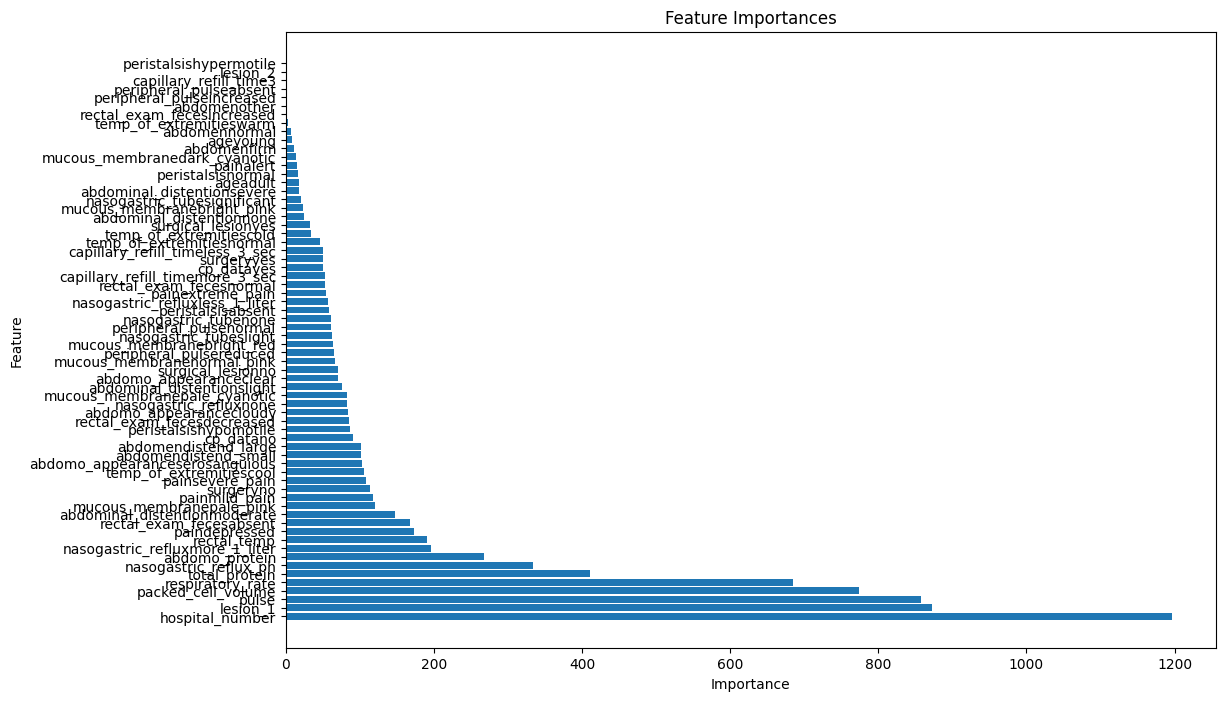

In [146]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

# Create and train the LGBMClassifier
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model.fit(train_imp.drop("outcome", axis=1), train_imp["outcome"])

# Print feature importances
feature_importances = pd.DataFrame({'feature': train_imp.drop("outcome", axis=1).columns,
                                    'importance': lgbm_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')

plt.show()



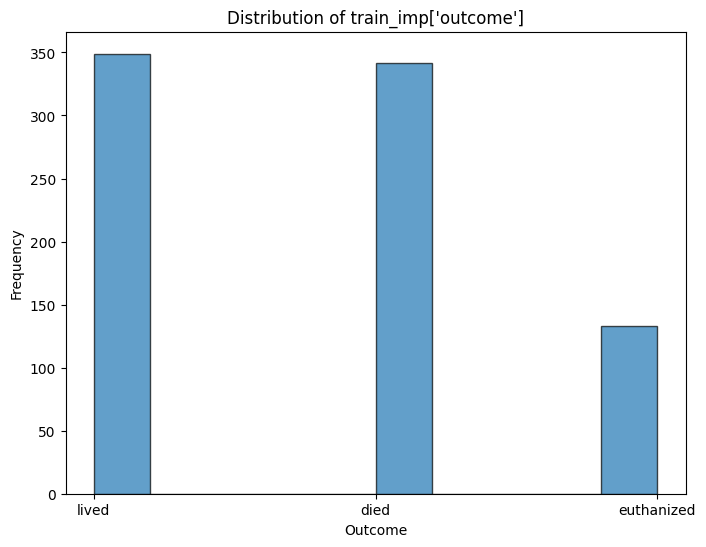

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(sample_submission['outcome'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.title("Distribution of submission['outcome']")
plt.show()


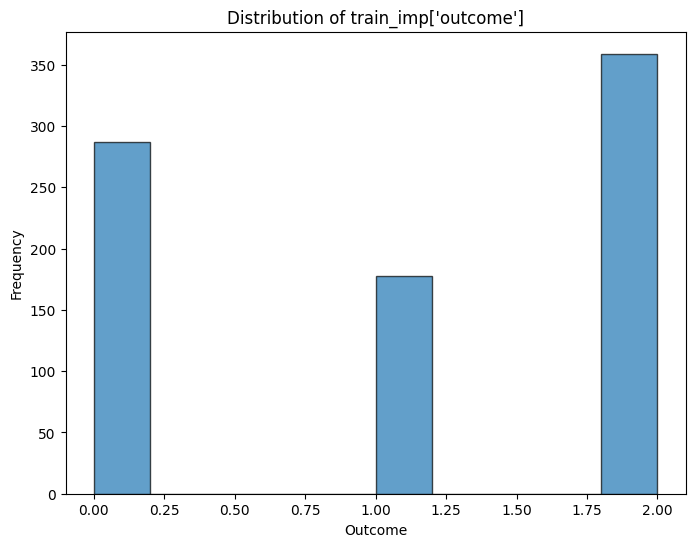

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(train_imp["outcome"], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.title("Distribution of train_imp['outcome']")
plt.show()
